<a href="https://colab.research.google.com/github/Noob919/Fellowship.ai_challenge/blob/main/Final_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
train_set = pd.read_excel("/content/train_data.xlsx")
train_features = train_set[['Time', 'Dose', 'pH','Efficacy']]
train_features = Normalizer().fit_transform(train_features)
X = train_features[:,0:3]
y = train_features[:,3:]

In [6]:
rfr = RandomForestRegressor(n_estimators=200)

In [8]:
rfr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=200)

In [9]:
test_set = pd.read_csv("/content/test_set.csv")
test_features = Normalizer().fit_transform(test_set)
X_test = test_features[:,0:3]
y_test = test_features[:,3:]

In [10]:
df_sq = test_set*test_set
df_sum = df_sq.sum(axis=1)
root =  pd.Series(data  = df_sum)
root = np.power(root, 0.5)

In [12]:
Pred  = rfr.predict(X_test)

In [13]:
mean_squared_error(y_test,Pred)

3.883132273253155e-05

In [14]:
math.sqrt(mean_squared_error(y_test,Pred))

0.00623147837455379

In [15]:
mean_absolute_error(y_test,Pred)

0.004795748592804787

In [16]:
r2_score(y_test,Pred)

0.9835595773650553

In [29]:
mean_absolute_percentage_error(y_test, Pred)

0.005412431821157687

In [18]:
X_test  = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
Final_actual = pd.concat([X_test,y_test], axis=1)
Final_actual.columns = ['Time', 'Dose','pH','Efficacy']
prediction = pd.DataFrame(Pred)

In [19]:
pred = []
for i in range(len(prediction)):
    p = prediction.iloc[i]*root[i]
    pred.append(p)

In [20]:
pred

[0    14.991449
 Name: 0, dtype: float64, 0    47.61448
 Name: 1, dtype: float64, 0    16.728096
 Name: 2, dtype: float64, 0    20.01787
 Name: 3, dtype: float64, 0    14.137615
 Name: 4, dtype: float64, 0    11.005288
 Name: 5, dtype: float64, 0    15.776173
 Name: 6, dtype: float64, 0    46.963592
 Name: 7, dtype: float64, 0    69.835902
 Name: 8, dtype: float64, 0    55.269269
 Name: 9, dtype: float64, 0    50.164047
 Name: 10, dtype: float64, 0    62.706997
 Name: 11, dtype: float64, 0    89.745908
 Name: 12, dtype: float64, 0    66.640737
 Name: 13, dtype: float64, 0    73.552762
 Name: 14, dtype: float64, 0    54.874153
 Name: 15, dtype: float64]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


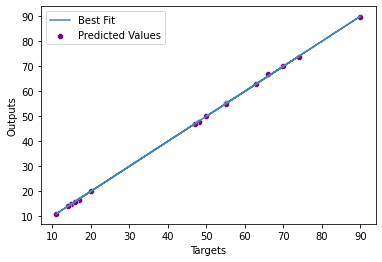

In [23]:
x = test_set['Efficacy']
y = [14.991449,47.61448,16.728096,20.01787,14.137615,11.005288,15.776173,46.963592,69.835902,55.269269,50.164047,62.706997,89.745908,66.640737,73.552762,54.874153]
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'purple', label = 'Predicted Values')
plt.plot(x, a*x+b, color='steelblue', label = 'Best Fit') 
plt.xlabel('Targets')
plt.ylabel('Outputs')
plt.legend()

In [25]:
print(a, b)

-0.013696170793440014


NameError: ignored

In [ ]:
y= 1.1686382597905058*x + (-0.013696170793440014)